# Decision Tree Regression


## Importing the necessary Libraries and Packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    root_mean_squared_error,
    root_mean_squared_log_error,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("../../../../Datasets/IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.6,534.80
1,26.0,625.19
2,27.8,660.63
3,20.6,487.71
4,11.5,316.24


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Description of the dataset


In [4]:
df.describe()

,Temperature,Revenue
count,500.000000,500.00000
mean,22.234000,521.57066
std,8.094131,175.40473
min,0.000000,10.00000
25%,17.100000,405.55750
50%,22.400000,529.37000
75%,27.725000,642.26000
max,45.000000,1000.00000


Checking if any null value exists


In [5]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Temperature', 'Revenue'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989759
Revenue,0.989759,1.000000


## Now taking 2 parts from the dataset

### X: which contains only the <b>Temperature</b> column<br>Y: which contains only the <b>Revenue</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the data


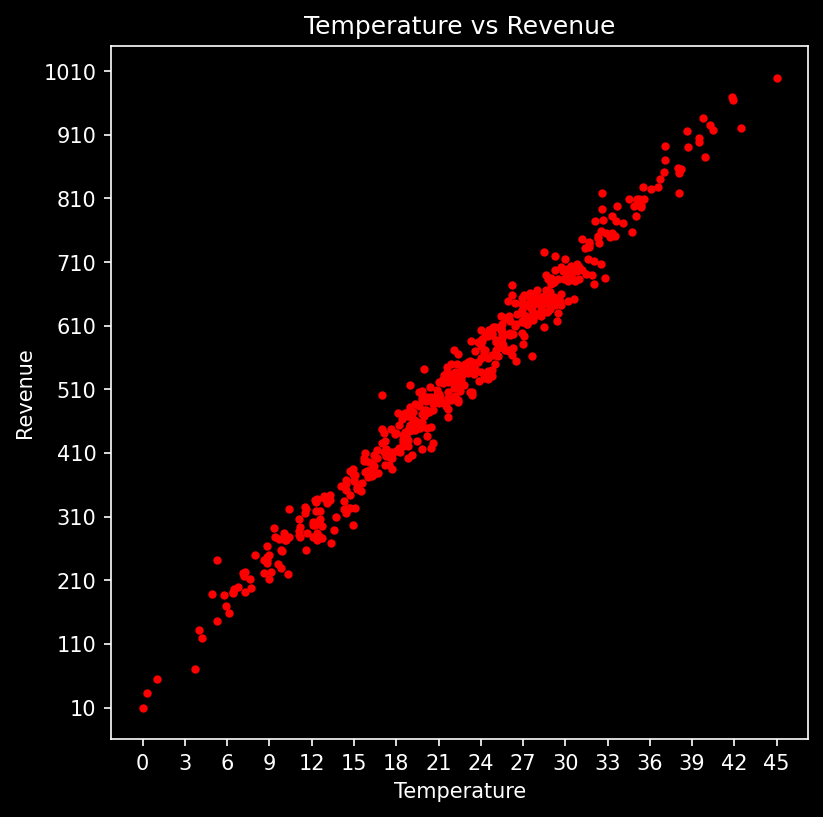

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Temperature = df["Temperature"]
Revenue = df["Revenue"]
plt.scatter(Temperature, Revenue, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Temperature_vs_Revenue.png", bbox_inches="tight")

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model


In [11]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [12]:
r = export_text(dtr, feature_names=df.columns[:-1].tolist())
print(r)

|--- Temperature <= 21.20
|   |--- Temperature <= 13.90
|   |   |--- Temperature <= 7.85
|   |   |   |--- Temperature <= 3.85
|   |   |   |   |--- value: [42.27]
|   |   |   |--- Temperature >  3.85
|   |   |   |   |--- value: [185.91]
|   |   |--- Temperature >  7.85
|   |   |   |--- Temperature <= 10.35
|   |   |   |   |--- value: [251.73]
|   |   |   |--- Temperature >  10.35
|   |   |   |   |--- value: [304.22]
|   |--- Temperature >  13.90
|   |   |--- Temperature <= 16.85
|   |   |   |--- Temperature <= 15.65
|   |   |   |   |--- value: [350.17]
|   |   |   |--- Temperature >  15.65
|   |   |   |   |--- value: [389.42]
|   |   |--- Temperature >  16.85
|   |   |   |--- Temperature <= 18.85
|   |   |   |   |--- value: [428.10]
|   |   |   |--- Temperature >  18.85
|   |   |   |   |--- value: [473.06]
|--- Temperature >  21.20
|   |--- Temperature <= 29.75
|   |   |--- Temperature <= 25.35
|   |   |   |--- Temperature <= 23.55
|   |   |   |   |--- value: [525.40]
|   |   |   |--- T

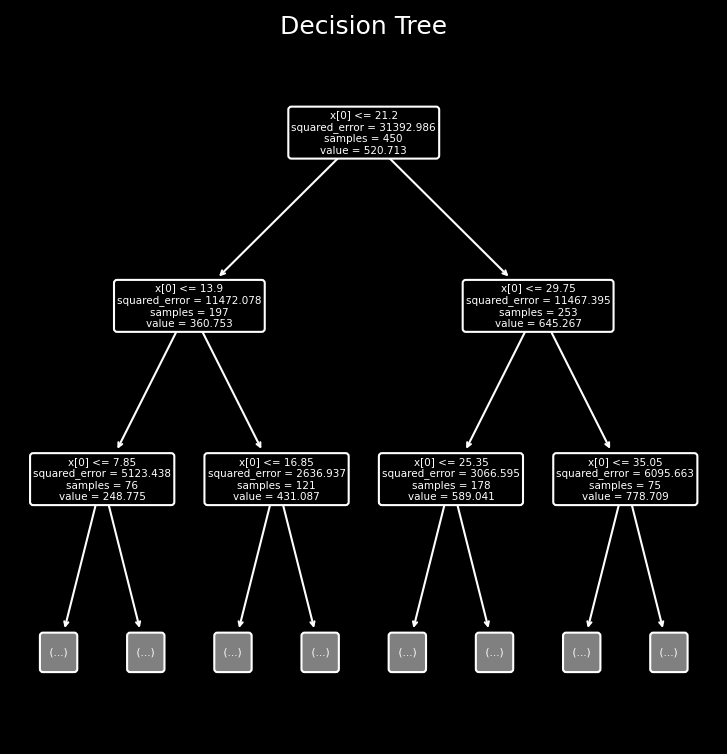

In [13]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plot_tree(dtr, ax=ax, max_depth=2, rounded=True, fontsize=5)
plt.title("Decision Tree")
plt.savefig("Images/Decision_Tree.png", bbox_inches="tight")

## Performance of the Model


In [14]:
print("The coefficient of determination :", r2_score(y_test, y_pred))
adjusted_r2_score = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (  # type: ignore
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9722918017196103
The adjusted coefficient of determination : 0.9717145475887689


## Plotting the Regression


### Training Dataset


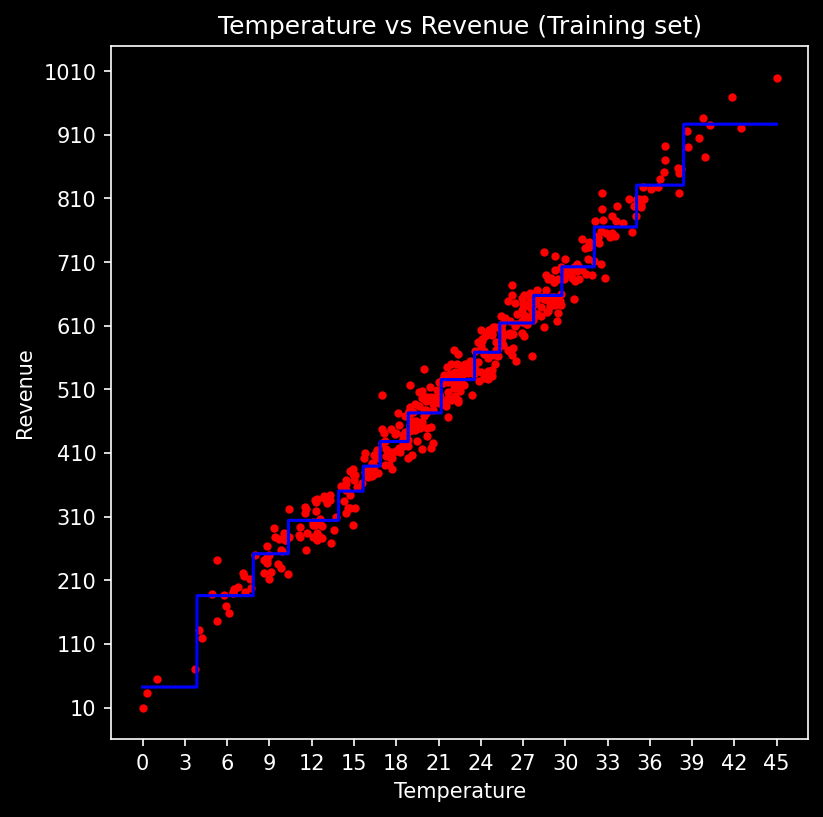

In [15]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_train_grid = np.arange(X_train.min(), X_train.max(), 0.01)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=MarkerStyle("."), color="red")
plt.plot(X_train_grid, dtr.predict(X_train_grid), color="blue")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Training set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Training_set.png", bbox_inches="tight")

### Test Dataset


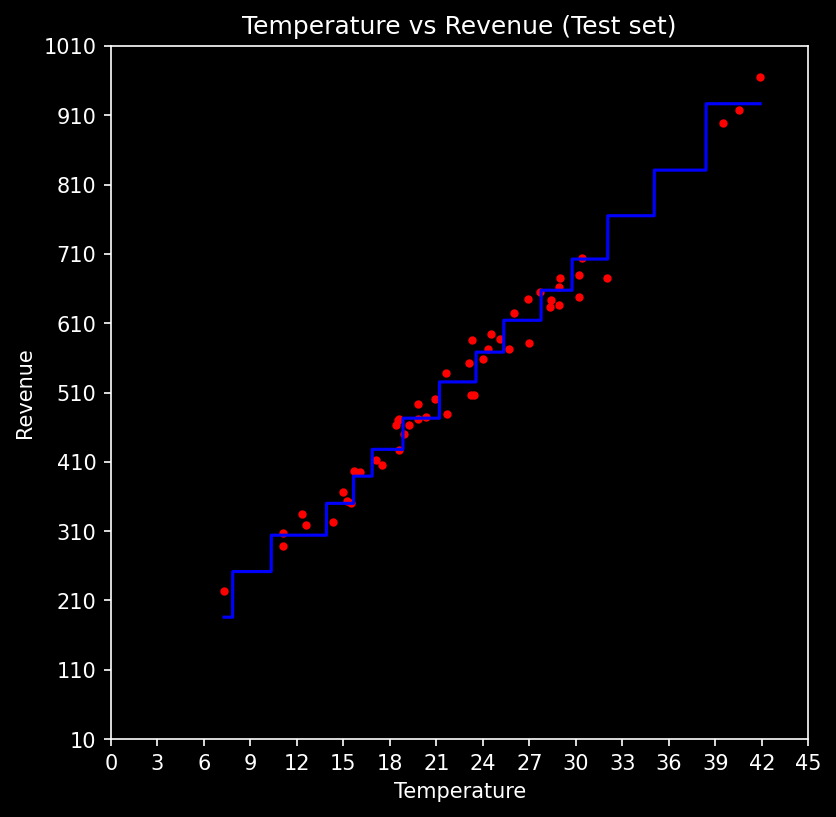

In [16]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_test_grid = np.arange(X_test.min(), X_test.max(), 0.01)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=MarkerStyle("."), color="red")
plt.plot(X_test_grid, dtr.predict(X_test_grid), color="blue")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Test set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Test_set.png", bbox_inches="tight")

## Additional Performance Metrics


In [17]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error (RMSE) :",
    root_mean_squared_error(y_test, y_pred),
)
print("Mean Squared Log Error (MSLE) :", mean_squared_log_error(y_test, y_pred))
print(
    "Root Mean Squared Log Error (RMSLE) :",
    root_mean_squared_log_error(y_test, y_pred),
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),
)

Mean Absolute Error (MAE) : 21.448069961462682
Mean Squared Error (MSE) : 677.4597954431807
Root Mean Squared Error (RMSE) : 26.028057850004497
Mean Squared Log Error (MSLE) : 0.0030908707609494375
Root Mean Squared Log Error (RMSLE) : 0.055595600194164985
Mean Absolute Percentage Error (MAPE) : 0.04301592514686367


## Saving the Model


In [18]:
dump(dtr, "../../../../Models/decisionTreeRegressor.joblib")

['../../../../Models/decisionTreeRegressor.joblib']